In [ ]:
#             Kamile de Souza Novaes

## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lendo o arquivo .csv do link

In [ ]:
database_link = 'https://raw.githubusercontent.com/weitzelleila/Datasets/main/hospital-readmission.csv'
df = pd.read_csv(database_link)

## Visualizando uma prévia dos dados

In [ ]:
# Imprimindo as primeiras 10 colunas

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


É possível observar que alguns valores são representados com '?' (nulo), então precisaremos tratar esses valores faltantes. Mas ainda será necessário verificar mais detalhadamente quais valores cada variável pode assumir para não deixar faltar alguma informação.

## Obtendo valores únicos por coluna

In [ ]:
for col in df:
    print(f"{col} = {df[col].unique()}")


Reparamos então que a variável "gênero" precisará ser tratada pois também possui valores inválidos.
```
gender = ['Female' 'Male' 'Unknown/Invalid']
```
Assim, checaremos ela individualmente.

Além disso, há alguns medicamentos que não nos fornecem muita informação pois todos possuem o mesmo valor.

```
examide = ['No']
citoglipton = ['No']
```



## Checando os valores nulos

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

# Para os gêneros:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


> Nota-se que há variáveis com muitos valores nulos (weight, payer_code e medical_specialty). Neste caso, apagaremos essas colunas. Nos outros casos, vamos tratá-los para que ainda possam ser utilizados.

## Deletando valores nulos

In [ ]:
# Removendo as colunas com muitos valores nulos
df = df.drop(['weight','payer_code','medical_specialty'], axis = 'columns')

# Removendo os medicamentos que não nos dão informação
df.drop(['examide','citoglipton'], axis='columns', inplace=True)

> Em seguida iremos criar um *index* com todas as **linhas** que possuem algum valor (dito anteriormente) que precisará ser apagado.

In [ ]:
# Criando uma "máscara" booleana para cada variável
mask_race = df['race'] == '?'
mask_diag1 = df['diag_1'] == '?'
mask_diag2 = df['diag_2'] == '?'
mask_diag3 = df['diag_3'] == '?'
mask_gender = df['gender'] == 'Unknown/Invalid'

# Combinando as máscaras usando "ou" e obtendo os índices das linhas que contém pelo menos 1 nulo
combined_mask = np.logical_or.reduce([mask_race, mask_diag1, mask_diag2, mask_diag3, mask_gender])
drop_indices = df[combined_mask].index

# Removendo as linhas do DataFrame
df.drop(drop_indices, inplace=True)

## Verificando se há duplicatas

In [ ]:
duplicates = df.duplicated()
print(df[duplicates])

Como não imprime nada, não há variáveis duplicatas em nosso DataFrame. Porém provavelmente vão existir números de pacientes duplicados (na variável "patient_nbr"), então vamos tratar isso em seguida.



## Realizando algumas operações para análise

In [ ]:
# Criando uma variável que é a soma de outras
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

 Estes são valores de quantos serviços hospitalares uma pessoa usou no ano passado. Somamos esses três serviços para criar uma nova variável "service_utilization" para tentarmos simplificar ao tentar descobrir alguma relação.

A mudança de medicação para diabéticos na admissão foi demonstrada por pesquisas anteriores como associada a menores taxas de reinternação. Assim, vamos contar quantas alterações foram feitas no total para cada paciente e colocar essa variável como um novo recurso.

In [ ]:
# Medicamentos
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin',
        'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
        'troglitazone', 'tolbutamide', 'acetohexamide']

# Contando alterações
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
df['numchange'].value_counts()


## Recodificando variáveis

In [ ]:
# Utilizando replace() para substituir os valores
df['A1Cresult'] = df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0, 'None': -99})
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -99})
df['admission_type_id'] = df['admission_type_id'].replace({2: 1, 7: 1, 6: 5, 8: 5})
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({6: 1, 8: 1, 9: 1, 13: 1,
                                                                         3: 2, 4: 2, 5: 2, 14: 2, 22: 2, 23: 2, 24: 2,
                                                                         12: 10, 15: 10, 16: 10, 17: 10,
                                                                         25: 18, 26: 18})
df['admission_source_id'] = df['admission_source_id'].replace({2: 1, 3: 1,
                                                               5: 4, 6: 4, 10: 4, 22: 4, 25: 4,
                                                               15: 9, 17: 9, 20: 9, 21: 9,
                                                               13: 11, 14: 11})

Nosso dataset usa valores de string para "gender", "race", "medication chance" e todos os medicamentos. Para melhorar nossa análise ajustaremos essas variáveis para numérico.

In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

Além disso, só nos é dado a idade como categorias de 10 anos em 10 anos, então não sabemos a idade exata de cada paciente. Queremos ser capazes de ver o efeito do aumento da idade na readmissão (mesmo que não tão especificamente), e para fazer isso assumiremos que a idade média do paciente está no ponto médio da categoria de idade.

In [ ]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

Como dito anteriormente, vários pacientes tiveram várias readmissões. Assim, vamos deletar as outras readmissões e deixar apenas a primeira.

In [ ]:
df.drop_duplicates(subset ="patient_nbr", keep = "first", inplace = True)
df.drop(['encounter_id','patient_nbr'], axis='columns', inplace=True)

O resultado que estamos procurando é se o paciente é readmitido no hospital em 30 dias ou não. Para reduzir nosso problema a uma classificação binária, combinamos a readmissão após 30 dias e a não readmissão em uma única categoria.

In [ ]:
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
df['readmitted'] = df['readmitted'].map({0: 0, 1: 1}).fillna(0)

## Visualização de Dados

Vamos importar mais uma biblioteca, a **seaborn**. É uma biblioteca de visualização de dados construída em cima da biblioteca matplotlib.

In [ ]:
import seaborn as sns

sns.set()

> **Distribuição de readmissão**

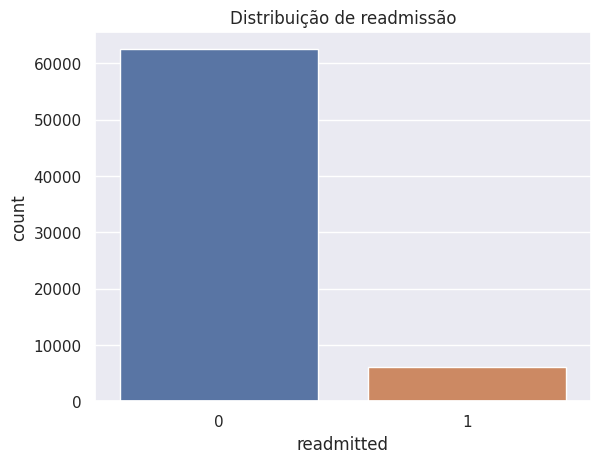

In [ ]:
sns.countplot(x = "readmitted", data = df)
plt.title("Distribuição de readmissão")
plt.show()

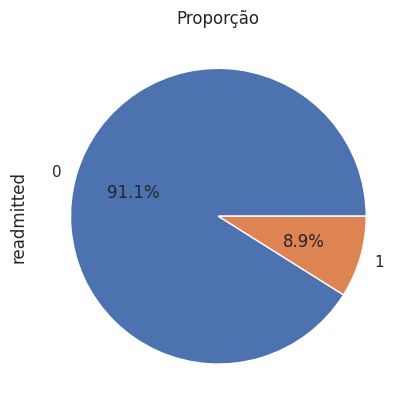

In [ ]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proporção")
plt.show()

> **Tempo de permanência X Readmissão**

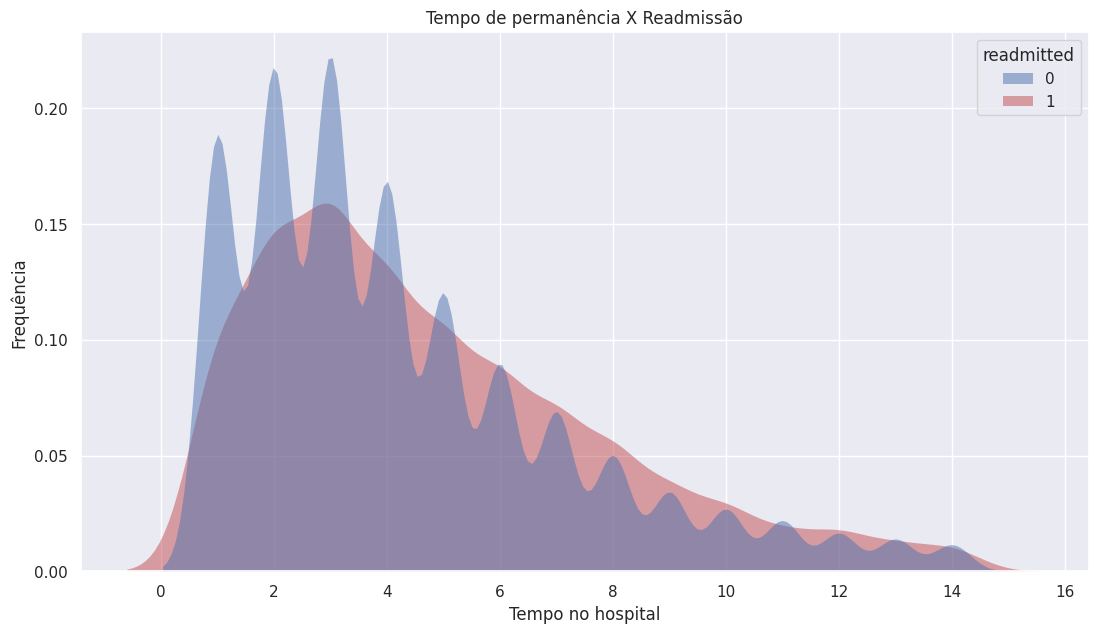

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.kdeplot(data=df, x='time_in_hospital', hue='readmitted', fill=True, common_norm=False, palette=['b', 'r'],
            alpha=.5, linewidth=0)

ax.set(xlabel='Tempo no hospital', ylabel='Frequência')
plt.title('Tempo de permanência X Readmissão')

plt.show()

> **Idade X Readmissão**

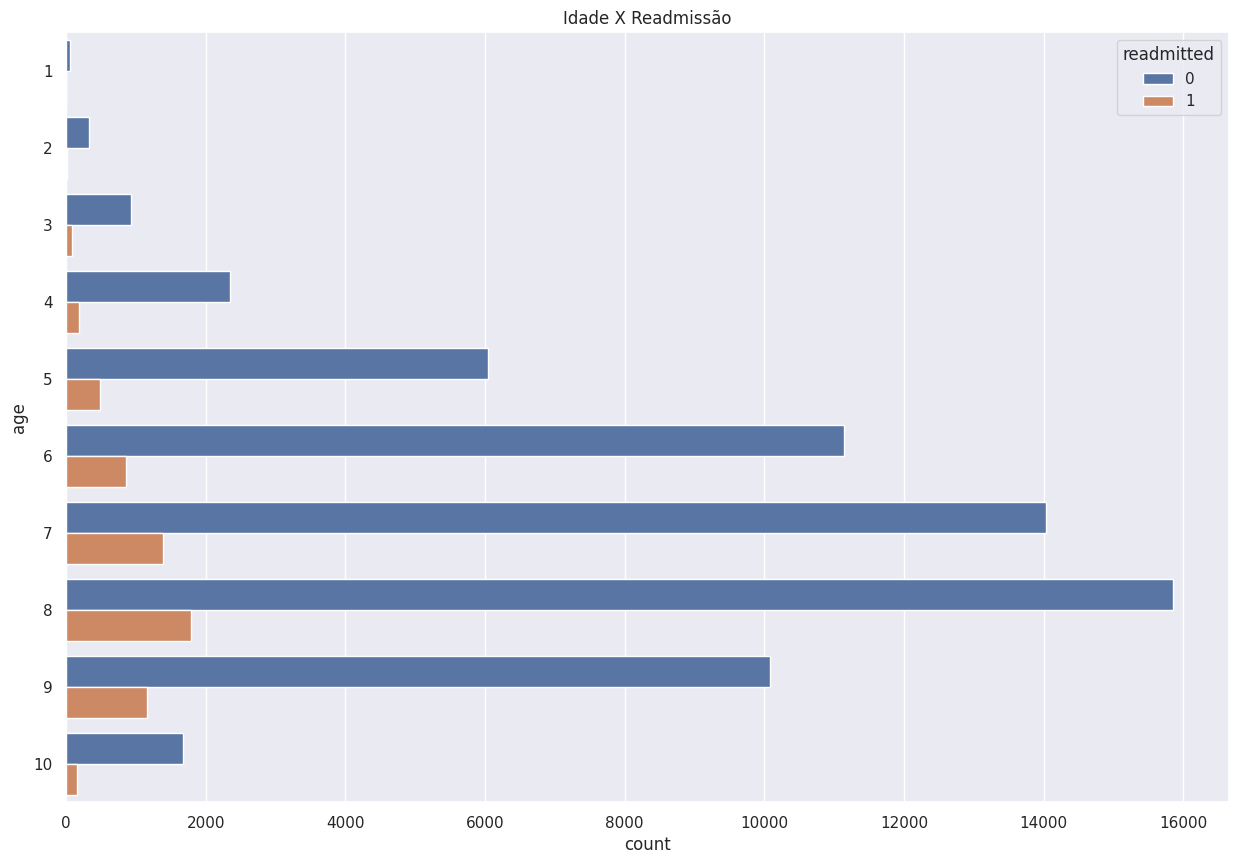

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df['age'], hue=df['readmitted'])
plt.title('Idade X Readmissão')
plt.show()

> **Raça X Readmissão**

<Axes: xlabel='count', ylabel='race'>

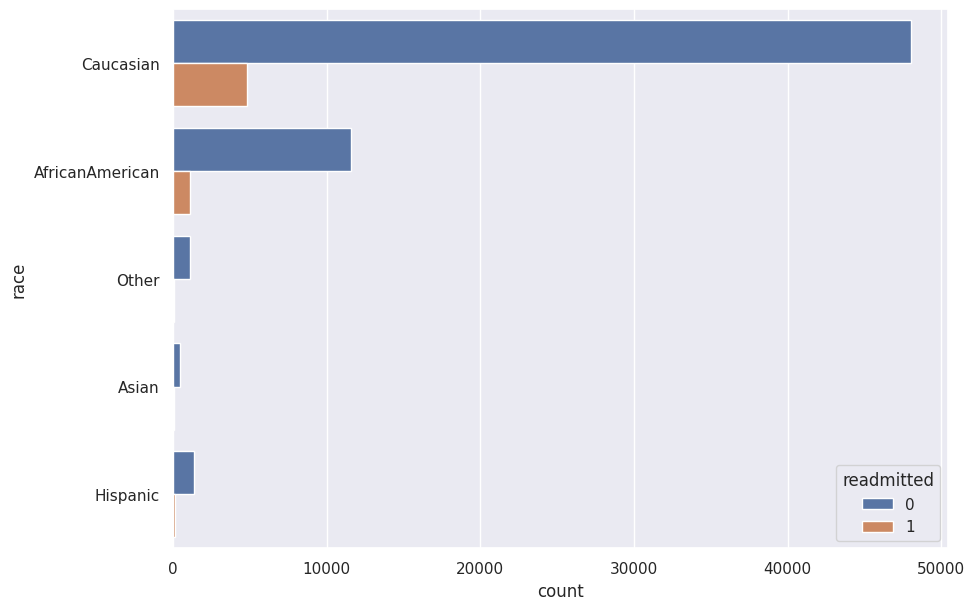

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.countplot(y = df['race'], hue = df['readmitted'])

> **Número de medicamento X Readmissão**

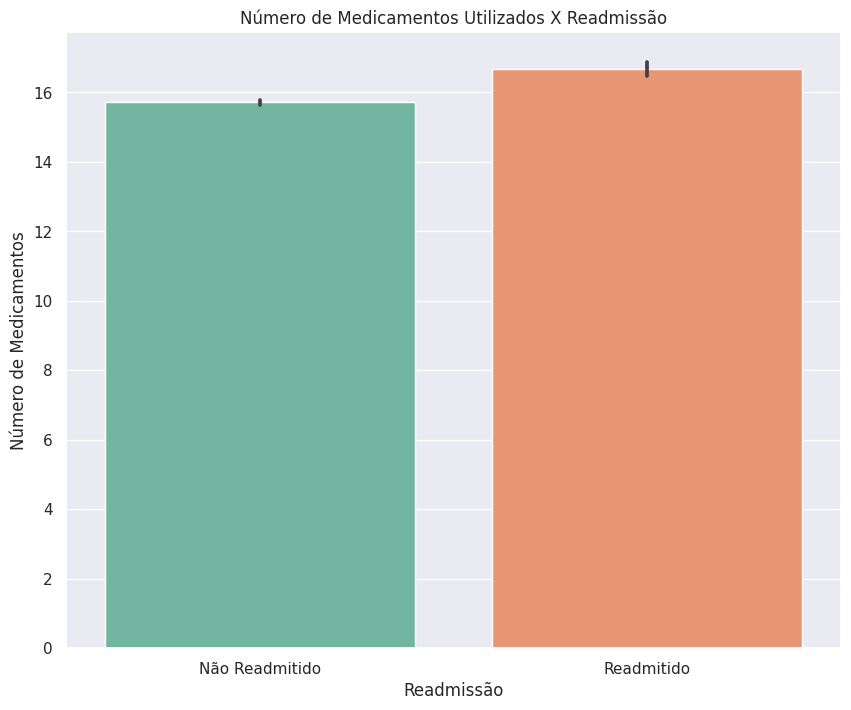

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['readmitted'], y=df['num_medications'], palette='Set2')
plt.title("Número de Medicamentos Utilizados X Readmissão")
plt.xlabel("Readmissão")
plt.ylabel("Número de Medicamentos")
plt.xticks(ticks=[0, 1], labels=['Não Readmitido', 'Readmitido'])

plt.show()

> **Gênero X Readmissão**

In [ ]:
df['gender'] = df['gender'].replace({'0': 'Female', '1': 'Male'})
df['gender'] = df['gender'].astype('category')

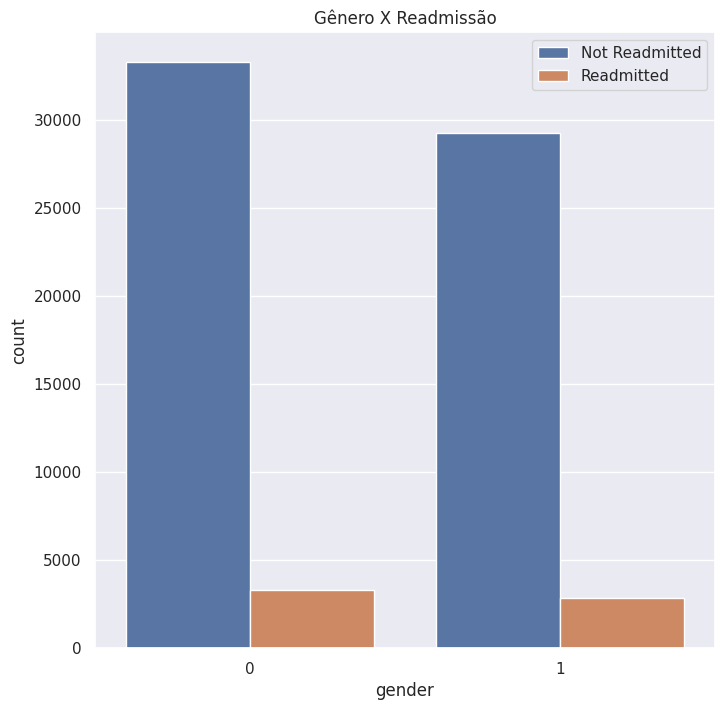

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df['gender'], hue=df['readmitted'])
plt.title("Gênero X Readmissão")
plt.legend(['Not Readmitted', 'Readmitted'])

plt.show()

> **Mudança de medicamento X Readmissão**

In [ ]:
df['change'] = df['change'].replace({0: 0, 1: 1})

Text(0.5, 1.0, 'Mudança de medicamento X Readmissão')

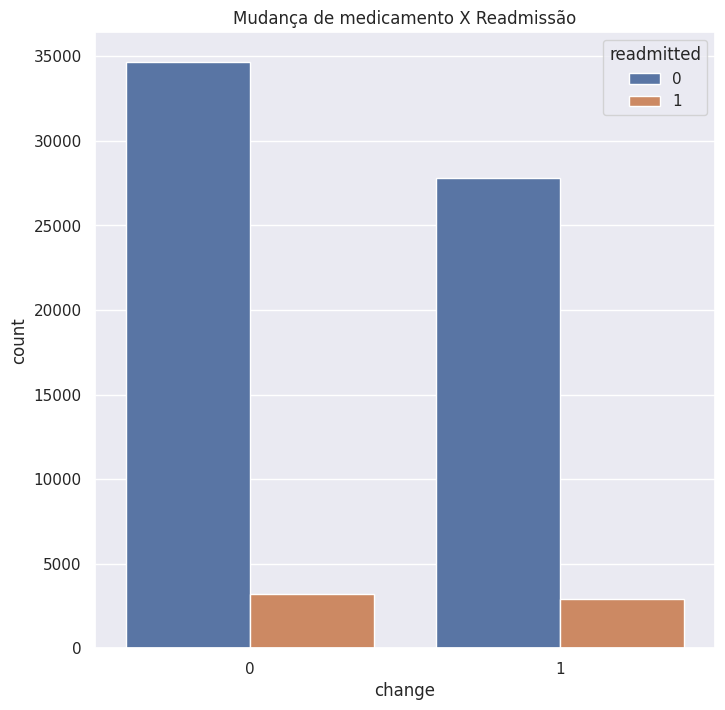

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df['change'], hue=df['readmitted'])
plt.title('Mudança de medicamento X Readmissão')

> **Glucose serum test result X Readmissão**

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmissão')

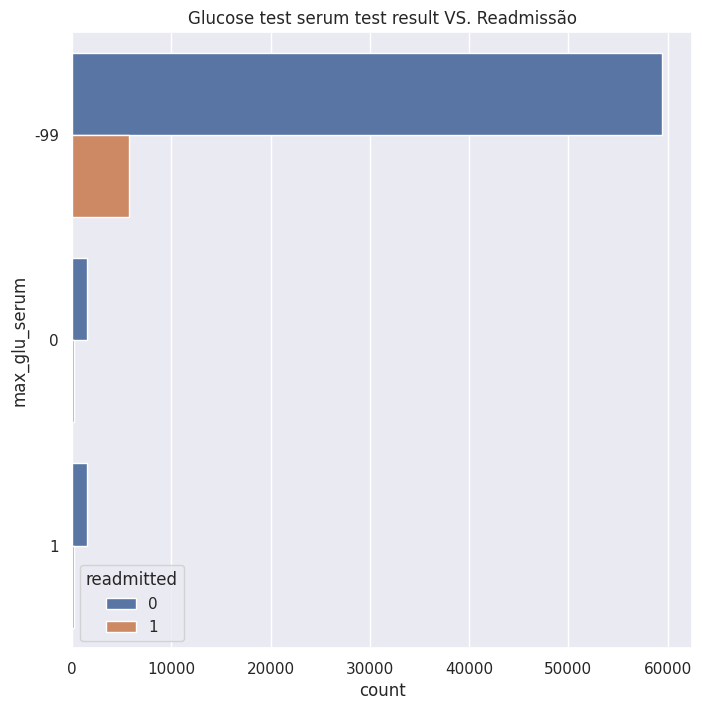

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmissão')

> **A1C result X Readmissão**

Text(0.5, 1.0, 'A1C test result VS. Readmission')

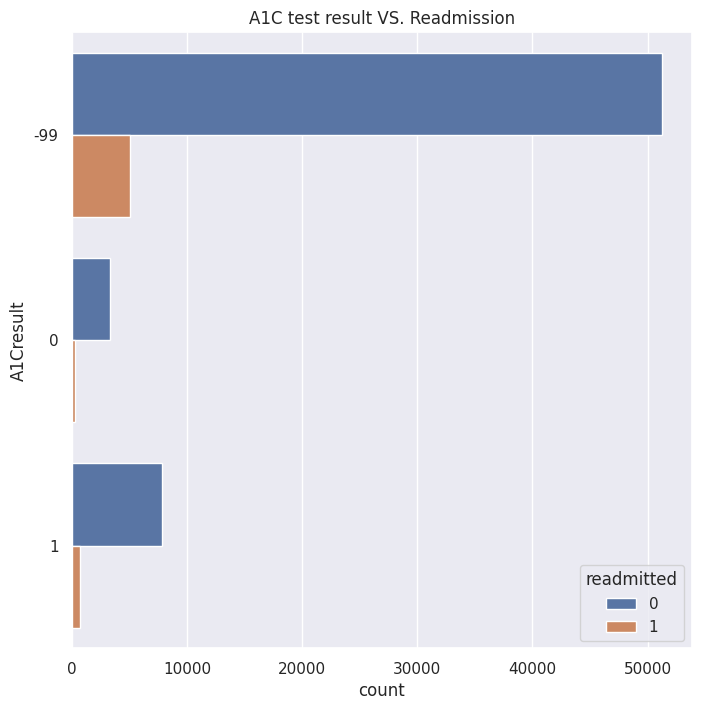

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')